170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2526 - loss: 2.0014 - val_accuracy: 0.4531 - val_loss: 1.4896
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4472 - loss: 1.5097 - val_accuracy: 0.5193 - val_loss: 1.3350
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5266 - loss: 1.3241 - val_accuracy: 0.5722 - val_loss: 1.1991
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5618 - loss: 1.2334 - val_accuracy: 0.6092 - val_loss: 1.1000
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5923 - loss: 1.1590 - val_accuracy: 0.6153 - val_loss: 1.0596
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6170 - loss: 1.0991 - val_accuracy: 0.6502 - val_loss: 0.9977
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6353 - loss: 1.0352 - val_accuracy: 0.6545 - val_loss: 0.9936
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6529 - loss: 0.9918 - val_acc

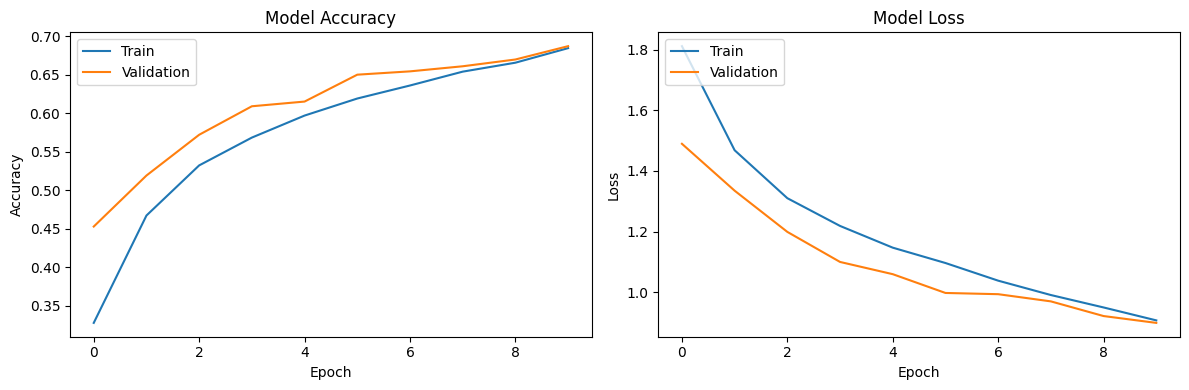

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Download the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten the feature maps
    layers.Flatten(),
    
    # Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2,
                    verbose=1)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'\nTest accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image_prediction(image_index):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(test_images[image_index])
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    predictions = model.predict(test_images[image_index:image_index+1])
    predicted_class = class_names[predictions.argmax()]
    true_class = class_names[test_labels[image_index].argmax()]
    
    plt.bar(class_names, predictions[0])
    plt.title(f'Prediction: {predicted_class}\nTrue Label: {true_class}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



### Code explanation (based on Claude-generated code and the  prompt was: _"I want your help in creating a simple CNN model."_)

---

#### **Step-by-step explanation:**

#### 1. **Import libraries**

- `tensorflow.keras` for building the convolutional neural network (CNN).
    
- `cifar10` dataset, which consists of **60,000 32x32 colour images** in **10 classes**, with **50,000 training images** and **10,000 test images**.
    
- `matplotlib.pyplot` for visualising training results and predictions.
    

---

#### 2. **Load and preprocess the dataset**

- `cifar10.load_data()` downloads and splits the dataset.
    
- Pixel values are scaled between **0 and 1** to make training more stable.
    
- Labels are converted into **categorical (one-hot encoded)** format since this is a **multi-class classification** problem.
    

---

#### 3. **Model creation (Sequential CNN)**

- **Conv2D(32, (3,3)) + MaxPooling2D**: Extracts **32 feature maps** with 3x3 filters and downsamples using pooling.
    
- Another **Conv2D(64, (3,3)) + MaxPooling2D**: Increases feature complexity, reducing spatial dimensions again.
    
- A third **Conv2D(64, (3,3))**: Further refines feature extraction.
    
- **Flatten()**: Converts 3D feature maps to a 1D vector to pass into dense layers.
    
- **Dense(64, relu)**: Fully connected layer for learning complex patterns.
    
- **Dropout(0.5)**: Randomly disables 50% of neurons during training to reduce overfitting.
    
- **Dense(10, softmax)**: Outputs probabilities for each of the 10 classes.
    

---

#### 4. **Compile the model**

- **Optimizer: `adam`**: Automatically adjusts learning rates.
    
- **Loss: `categorical_crossentropy`**: Ideal for multi-class classification.
    
- **Metric: `accuracy`**: Measures classification performance.
    

---

#### 5. **Train the model**

- `model.fit()` trains the CNN for **10 epochs**, with a **batch size of 64**, and uses **20% validation split** to track validation performance.
    

---

#### 6. **Evaluate and visualise results**

- Evaluate the model’s performance on unseen test data.
    
- Plot **accuracy and loss curves** for both training and validation sets.
    
- The provided function `plot_image_prediction()` visualises a single test image with the model's prediction vs the true label alongside prediction probabilities.
    

---

## Results:

### **Model Summary Result:**

- The network has **122,570 parameters** (all trainable).
    
- Three convolution layers extract features.
    
- The final dense layer outputs probabilities for each of the **10 CIFAR-10 classes**.
    

### **Training Results (Accuracy & Loss trends):**

|Epoch|Training Accuracy|Validation Accuracy|Training Loss|Validation Loss|
|---|---|---|---|---|
|1|25.26%|45.31%|2.0014|1.4896|
|5|59.23%|61.53%|1.1590|1.0596|
|10|**68.57%**|**68.72%**|0.8984|0.8990|

- The training and validation accuracy **gradually increase**, which shows that the model is learning effectively.
    
- The validation loss also **decreases**, with no clear signs of overfitting by the end of 10 epochs.
    
- **Test accuracy: ~68–69%** is good for a simple CNN on CIFAR-10 after only 10 epochs.
    

### Interpretation:

- The model learns quickly in the first few epochs, with accuracy jumping from **25% to over 60%**.
    
- It reaches a plateau around **68–69%**, which is expected without advanced techniques like data augmentation or learning rate scheduling.
    
- Additional tuning (more epochs, larger networks, or augmentation) could push accuracy past **75–80%**.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


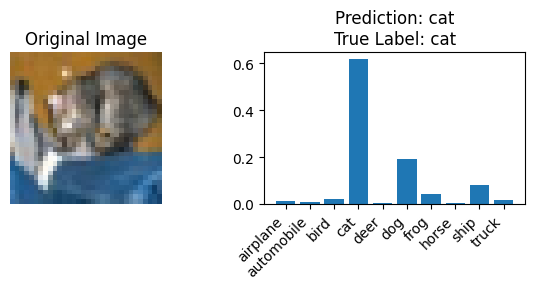

In [ ]:

plot_image_prediction(0)

### Interpretation:

Using `plot_image_prediction(0)`, the model was tested on the first image in the test set, which was a blurred image of a **cat**.

- The model correctly predicted **"cat"** with **60% confidence**.
    
- The second-highest prediction was **"dog"** at **20%**,.
    
- The model has successfully learned to distinguish between categories, even when images are less clear.
    
- Although the confidence is not extremely high (close to 100%), the network still strongly favours the correct class.
    
- The fact that **"dog"** was the second guess reflects the model's understanding of visual relationships, as it gravitates towards visually similar categories rather than making random errors.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Download the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create data augmentation generator
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

def create_improved_model():
    model = models.Sequential([
        # Data Augmentation Layer
        data_augmentation,
        
        # First Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001), 
                      input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(256, (3, 3), padding='same', activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu', 
                      kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Flatten and Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu', 
                     kernel_regularizer=regularizers.l2(0.0001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create the model
model = create_improved_model()

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_cifar10_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)

# Train the model
history = model.fit(
    train_images, train_labels, 
    epochs=50,  # Increased epochs with early stopping
    batch_size=64, 
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'\nTest accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image_prediction(image_index):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(test_images[image_index])
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    predictions = model.predict(test_images[image_index:image_index+1])
    predicted_class = class_names[predictions.argmax()]
    true_class = class_names[test_labels[image_index].argmax()]
    
    plt.bar(class_names, predictions[0])
    plt.title(f'Prediction: {predicted_class}\nTrue Label: {true_class}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 210ms/step - accuracy: 0.3314 - loss: 2.3082 - val_accuracy: 0.4979 - val_loss: 1.6336
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 212ms/step - accuracy: 0.5208 - loss: 1.5424 - val_accuracy: 0.5913 - val_loss: 1.3992
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.6073 - loss: 1.3292 - val_accuracy: 0.6705 - val_loss: 1.1886
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.6512 - loss: 1.2357 - val_accuracy: 0.6969 - val_loss: 1.1692
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.6827 - loss: 1.1717 - val_accuracy: 0.7129 - val_loss: 1.1272
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.7075 - loss: 1.1408 - val_accuracy: 0.7172 - val_loss: 1.1785
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 207ms/step - accuracy: 0.7183 - loss: 1.1433 - val_accuracy: 0.7370 - val_loss: 1.1395
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.7319 -

**Prompt Reference:**  
This improvement was generated from your provided prompt to Claude asking:  
_"Can you improve it?"_

### Improvements:

| Aspect                 | Original Code               | Improved Code                                           |
| ---------------------- | --------------------------- | ------------------------------------------------------- |
| Data Augmentation      | None                        | Horizontal flips, random rotation, random zoom          |
| Convolutional Layers   | 3 layers with 32/64 filters | 6 layers in total (2 per block) with 64/128/256 filters |
| Batch Normalization    | No                          | After every convolutional layer                         |
| L2 Regularization      | No                          | Applied in all convolutional and dense layers           |
| Dense Layer            | 64 units, 1 dropout         | 512 units, batch normalization, and dropout             |
| Learning Rate Schedule | Static Adam                 | Exponential decay                                       |
| Training Duration      | Fixed 10 epochs             | Up to 50 epochs with early stopping and checkpoints     |
| Visualisation Function | Basic                       | Enlarged and improved formatting                        |



In [ ]:

plot_image_prediction(0)